In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')


In [2]:

df = pd.read_csv('Attrition Data.csv')
df.head()


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


#### 1. For different departments find the mean age of the employees who have left the company.

In [9]:

df[(df.Attrition == 'Yes')].groupby(by = 'Department').agg({'Age': 'mean'})


,Age
Department,
Human Resources,30.083333
Research & Development,33.473684
Sales,34.260870


#### 2. For different departments find the distance from home which is covered by the maximum number of employees to get to the company. ( Hint: Use Mode)

In [71]:

df.groupby(by = 'Department').agg({'DistanceFromHome' :  lambda x: x.mode()[0]})


,DistanceFromHome
Department,
Human Resources,2
Research & Development,1
Sales,2


#### 3. The company wants to compare the average salary of employees who have left the job and those who haven’t. Analyze different Departments

In [21]:

left = df[(df.Attrition == 'Yes')].groupby(by = 'Department').agg({'MonthlyIncome': 'mean'}).reset_index()
left


,Department,MonthlyIncome
0,Human Resources,3715.750000
1,Research & Development,4108.075188
2,Sales,5908.456522


In [22]:

stay = df[(df.Attrition == 'No')].groupby(by = 'Department').agg({'MonthlyIncome': 'mean'}).reset_index()
stay


,Department,MonthlyIncome
0,Human Resources,7345.980392
1,Research & Development,6630.326087
2,Sales,7232.240113


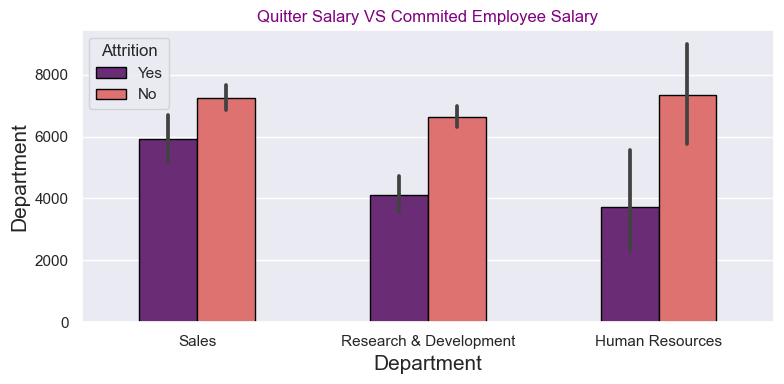

In [74]:

sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,4))
sns.barplot(x = df.Department, y = df.MonthlyIncome, hue = df.Attrition, edgecolor = 'black', palette = 'magma', width = 0.5)
plt.xlabel('Department', fontsize = 15)
plt.ylabel('Department', fontsize = 15)
plt.title('Quitter Salary VS Commited Employee Salary', color = 'purple')
plt.tight_layout()
plt.show()


#### 4. The company wants to analyze the median of job satisfaction ratings for different marital statuses.

In [13]:

job_rating = df.groupby(by = 'MaritalStatus').agg({'JobSatisfaction' : 'median'}).reset_index()
job_rating


,MaritalStatus,JobSatisfaction
0,Divorced,3.0
1,Married,3.0
2,Single,3.0


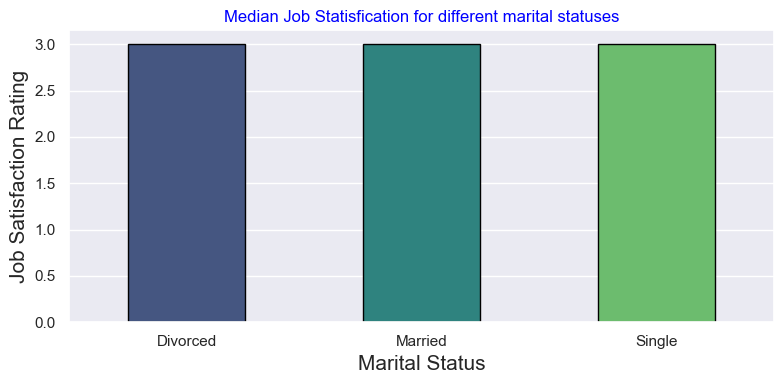

In [20]:

sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,4))
sns.barplot(x = job_rating.MaritalStatus, y = job_rating.JobSatisfaction, edgecolor = 'black', palette = 'viridis', width = 0.5)
plt.xlabel('Marital Status', fontsize = 15)
plt.ylabel('Job Satisfaction Rating', fontsize = 15)
plt.title('Median Job Statisfication for different marital statuses', color = 'blue')
plt.tight_layout()
plt.show()


#### 5. Find the mean of environment satisfaction rating for the employees with different Education Fields.

In [26]:

environment_rating = df.groupby(by = 'EducationField').agg({'EnvironmentSatisfaction' : 'mean'}).reset_index()
environment_rating


,EducationField,EnvironmentSatisfaction
0,Human Resources,2.666667
1,Life Sciences,2.689769
2,Marketing,2.723270
3,Medical,2.687500
4,Other,3.012195
5,Technical Degree,2.818182


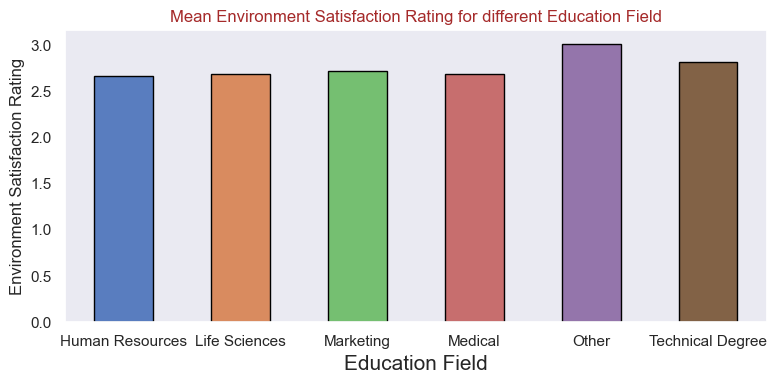

In [37]:

sns.set_theme(style="dark")
plt.figure(figsize = (8,4))
sns.barplot(x = environment_rating.EducationField, y = environment_rating.EnvironmentSatisfaction, edgecolor = 'black', palette = 'muted', width = 0.5)
plt.xlabel('Education Field', fontsize = 15)
plt.ylabel('Environment Satisfaction Rating', fontsize = 12)
plt.title('Mean Environment Satisfaction Rating for different Education Field', color = 'brown')
plt.tight_layout()
plt.show()


#### 6. The company wants to know if the employees who have spent a good number of years in their company are leaving the company or not.
#### For that, they want to know the average year spent in the company by the employees in different departments.

In [43]:

average_spent = df.groupby(by = ['Department', 'Attrition']).agg({'YearsAtCompany' : 'mean'}).reset_index()
average_spent


,Department,Attrition,YearsAtCompany
0,Human Resources,No,7.960784
1,Human Resources,Yes,4.166667
2,Research & Development,No,7.171498
3,Research & Development,Yes,4.954887
4,Sales,No,7.745763
5,Sales,Yes,5.510870


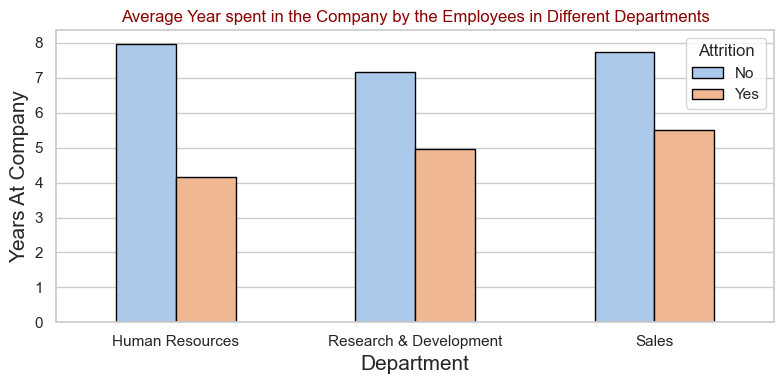

In [47]:

sns.set_theme(style="whitegrid")
plt.figure(figsize = (8,4))
sns.barplot(x = average_spent.Department, y = average_spent.YearsAtCompany, hue = average_spent.Attrition, edgecolor = 'black', palette = 'pastel', width = 0.5)
plt.xlabel('Department', fontsize = 15)
plt.ylabel('Years At Company', fontsize = 15)
plt.title('Average Year spent in the Company by the Employees in Different Departments' , color = 'darkred')
plt.tight_layout()
plt.show()


#### 7. Find the mean, median, and mode of work-life balance ratings for the employees who are married and are from the medical field.

In [103]:

stats = df[(df.MaritalStatus == 'Married')&
        (df.EducationField == 'Medical')]['WorkLifeBalance'].agg(['mean', 'median',  lambda x: x.mode()[0]]).reset_index()
stats.columns = ['Statistics', 'Work LifeBalance Ratings']
stats.replace('<lambda>', 'mode', inplace = True)
stats


,Statistics,Work LifeBalance Ratings
0,mean,2.766667
1,median,3.000000
2,mode,3.000000


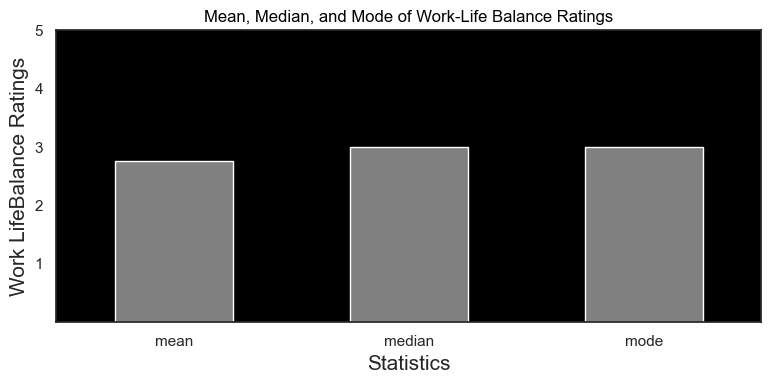

In [104]:

sns.set_style('white',{'axes.facecolor': 'black'})
plt.figure(figsize = (8,4))
sns.barplot(x = stats.Statistics, y = stats['Work LifeBalance Ratings'], edgecolor = 'white', color = 'grey', width = 0.5)
plt.xlabel('Statistics', fontsize = 15)
plt.ylabel('Work LifeBalance Ratings', fontsize = 15)
plt.title('Mean, Median, and Mode of Work-Life Balance Ratings', color = 'black')
plt.tight_layout()
plt.yticks([1,2,3,4,5])
plt.show()


#### 8. Find the mean, median, and mode of the number of companies the employee has worked for before joining ABC for the employees whose monthly salary is greater than 3000 and are from the Research & Development department.

In [102]:

stats_of_company = df[(df.MonthlyIncome > 3000) &
        (df.Department == 'Research & Development')]['NumCompaniesWorked'].agg(['mean','median', lambda x: x.mode()[0]]).reset_index()
stats_of_company.columns = ['Statistics', 'No of Comapnies']
stats_of_company.replace('<lambda>', 'mode', inplace = True)
stats_of_company


,Statistics,No of Comapnies
0,mean,2.956061
1,median,2.000000
2,mode,1.000000


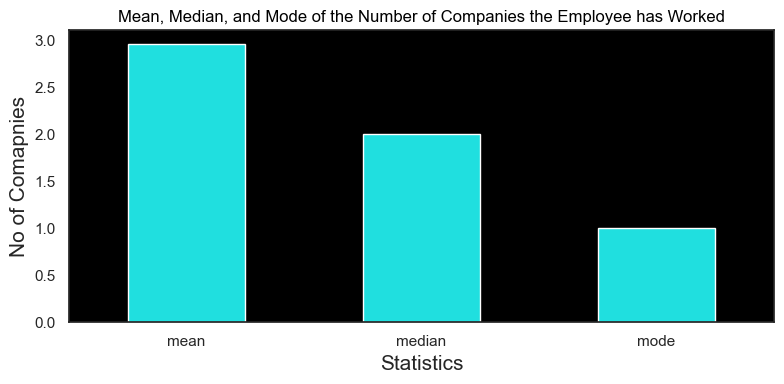

In [118]:

sns.set_style('white',{'axes.facecolor': 'black'})
plt.figure(figsize = (8,4))
sns.barplot(x = stats_of_company.Statistics, y = stats_of_company['No of Comapnies'], edgecolor = 'white', color = 'cyan', width = 0.5)
plt.xlabel('Statistics', fontsize = 15)
plt.ylabel('No of Comapnies', fontsize = 15)
plt.title('Mean, Median, and Mode of the Number of Companies the Employee has Worked', color = 'black')
plt.tight_layout()
plt.show()


#### 9. Create a Correlation matrix as well as the correlation heatmap and find out the following correlation values:
-  What is the correlation value between the monthly salary and the number of years the employee has worked in that company
-  What is the correlation value between the monthly salary and the age of the employee.



In [124]:

corr1 = df[['MonthlyIncome', 'YearsAtCompany']].corr()
corr1


,MonthlyIncome,YearsAtCompany
MonthlyIncome,1.000000,0.514285
YearsAtCompany,0.514285,1.000000


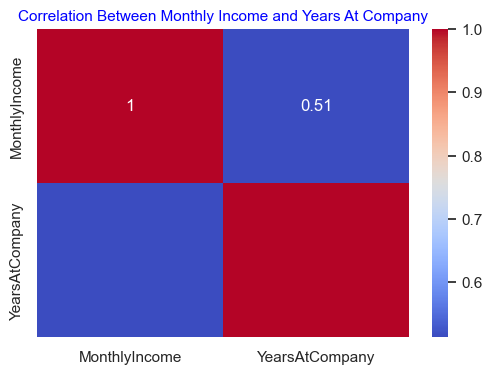

In [136]:

plt.figure(figsize = (6, 4))
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.title('Correlation Between Monthly Income and Years At Company', color = 'blue', fontsize = 11)
plt.show()


In [137]:

corr2 = df[['MonthlyIncome', 'Age']].corr()
corr2


,MonthlyIncome,Age
MonthlyIncome,1.000000,0.497855
Age,0.497855,1.000000


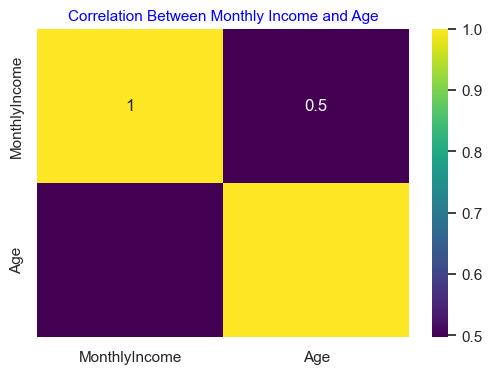

In [139]:

plt.figure(figsize = (6, 4))
sns.heatmap(corr2, annot = True, cmap = 'viridis')
plt.title('Correlation Between Monthly Income and Age', color = 'blue', fontsize = 11)
plt.show()


### Additional: 
#### Create three different categories depending on the employee’s age.
* If the employee’s age is below 25 then the category would be “Fresher”.
* If the employee’s age is between 25 and 50 then “Intermediate” and if it is above 50 then “Expert”

In [140]:

def ExperienceLevel(age):
    if age < 25:
        return 'Fresher'
    elif 25 <= age <= 50:
        return 'Intermediate'
    else:
        return 'Expert'

df['Experience Level'] = df.Age.apply(ExperienceLevel)

In [143]:
df['Experience Level'].value_counts()

Experience Level
Intermediate    1230
Expert           143
Fresher           97
Name: count, dtype: int64

#### Find the mean, median, mode, and standard deviation of the monthly salary for the employees in the above categories.

In [154]:
stats_of_salary = df.groupby(by = 'Experience Level').agg({'MonthlyIncome' : ['mean', 'median', lambda x:x.mode()[0], 'std']}).reset_index()
stats_of_salary

Experience Level MonthlyIncome                                 
                            mean   median <lambda_0>          std
0           Expert  10574.881119  10552.0      17328  5918.049639
1          Fresher   2658.773196   2610.0       2323   890.087221
2     Intermediate   6332.682927   4973.5       2342  4388.634999

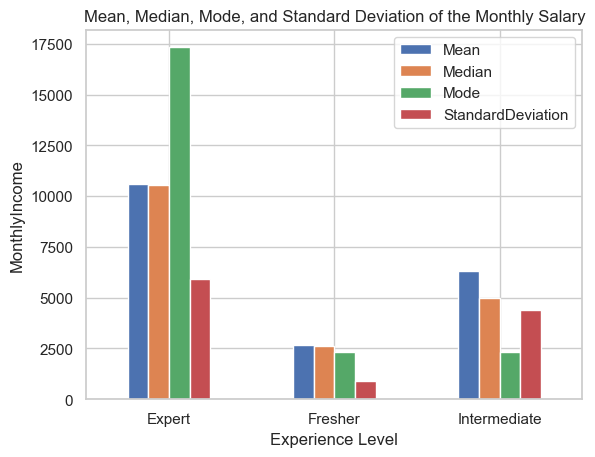

In [167]:

stats_of_salary.columns = ['Experience Level', 'Mean', 'Median', 'Mode', 'StandardDeviation']
stats_of_salary.plot(kind = 'bar')
plt.xlabel('Experience Level')
plt.ylabel('MonthlyIncome')
plt.xticks(ticks=range(len(stats_of_salary['Experience Level'])), labels=stats_of_salary['Experience Level'], rotation = 360)
plt.title('Mean, Median, Mode, and Standard Deviation of the Monthly Salary', fontsize = 12)
plt.show()
